In [1]:
4.73

4.73

In [3]:
60*0.73

43.8

In [1]:
# Web scrapying
from bs4 import BeautifulSoup # modulo de BeautifulSoup
import requests
import ssl
import json

# Data manipulation
import pandas as pd
import numpy as np

# Spyding

The idea is to gather data from the web. First, we need to select a website (and its [URL](https://psdeals.net/tr-store)) to extract the data. Our target is the price of a game in the Turkey store. Initially, we'll use [this website](https://psdeals.net/tr-store) to construct our data.

In this first step, we will analyze how the website is constructed and how we can obtain the crucial details—mainly the price and the name of the game we are searching for. Because nothing says "fun" like hunting down video game prices on the internet, right?



## Step 1: The URL

Let's dive into the thrilling world of URL manipulation! Our mission: search for a specific term on the web. For this adventure, we'll create a tool to search for a specific term. Let's say we're interested in finding the game "God of War." The main page looks like this:

<img src="../pics/main page.png" alt="Main Page" width="500"/>

After performing a search, here's the result. Now we need to examine the structure of the URL generated by the search.

<img src="../pics/search-page.png" alt="Search Page" width="500"/>

This means the URL follows a standard search format with parameters added. The standard URL looks something like `https://psdeals.net/tr-store/search?search_query=`, and the search term is appended to the URL, separated by a "+" symbol.

So, with that in mind...



In [3]:
# let's create a function to generate URLs of the games that we want to search
def search_games():
    """
    Generates search URLs for the given items.

    Args: 
        None. The games' names are provided by the user through the console.

    Returns:
        List[str]: A list of URLs to search for the specified games.
    """
    items = []
    game = input("Insert a game (or press enter to finish): ")
    while game != "":
        items.append(game)
        game = input("Insert a game (or press enter to finish): ")

    # Generating URLs to search :D
    base_url = "https://psdeals.net/tr-store/search?search_query="
    urls = [base_url + i.replace(" ", "+") for i in items]

    print("You asked for: {}".format(", ".join(items)))
    return urls

urls = search_games()
print(urls)



You asked for: god of war, sekiro, spiderman
['https://psdeals.net/tr-store/search?search_query=god+of+war', 'https://psdeals.net/tr-store/search?search_query=sekiro', 'https://psdeals.net/tr-store/search?search_query=spiderman']


# Step 2: The Soup

Now that we have the URLs, we can extract the data from the pages.

For this step, we will use the `requests` library to fetch the pages and the `BeautifulSoup` library to parse the HTML.

First, we need to install the required libraries. If you don't have them, well... Go on! Do it, and then I'll illustrate you, my dear comrade.

With that being said, let us cook a beautiful Soup!


In [4]:
# With only 1 URL: Just to get 
url = urls[0]
headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
}
r = requests.get(url, headers=headers)
print("Status code:", r.status_code)
print("Encoding:", r.encoding)
soup = BeautifulSoup(r.text, "lxml")

Status code: 200
Encoding: UTF-8


Well, we now have a page with all the data regarding the search. If we look at the "soup," we have all the ingredients, but it's kind of messy to understand due to the "HTML" format. Indeed, if we look at a general idea of the HTML code of the full page, we would find it hard to understand all formats and where to search.

A pretty useful tactic is to identify a portion of what we are looking for within the webpage and then try to figure out (more or less) where the info that we are looking for (price and game name) is located.

<img src="../pics/web inspection.png" alt="Web Inspection" width="500"/>

If we look at the inspect parameter in the web browser, we discover that the game price is somehow within a tag called "div" with different classes. Now, this is a child tag from a parent tag called "div" with class "game-collection-item-details-title."

So a very good first step is to look in this section. Let's see what we can find there....



[<div class="game-collection-item col-md-2 col-sm-4 col-xs-6" itemscope="" itemtype="http://schema.org/Product">
 <a class="game-collection-item-link" href="/tr-store/game/68749/god-of-war-ghost-of-sparta-psp">
 <div class="game-collection-item-container" style="background-color: #7E5E49">
 <div class="game-collection-item-top">
 <img alt="TR" class="game-collection-item-top-flag" data-pagespeed-url-hash="2165738322" onload="pagespeed.CriticalImages.checkImageForCriticality(this);" src=""/>
 <span class="game-collection-item-top-platform">PS Vita / PSP</span>
 </div>
 <div class="game-collection-item-image-placeholder">
 <picture>
 <source data-srcset="https://store.playstation.com/store/api/chihiro/00_09_000/container/TR/tr/99/EP9000-NPEG00044_00-GPCGODOFWA000001/0/image?_version=00_09_000&amp;platform=chihiro&amp;bg_color=000000&amp;opacity=100&amp;w=153&amp;h=153 1x, https://store.playstation.com/store/api/chihiro/00_09_000/container/TR/tr/99/EP9000-NPEG00044_00-GPCGODOFWA000001/0/i
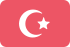
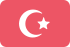
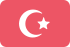
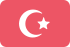
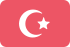
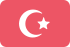
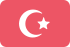
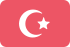
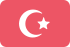
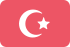
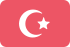
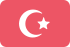
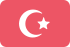
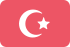
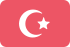
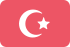
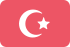
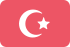

In [5]:
soup.find_all("div", class_= "game-collection-item")

I gotta be honest. I cant see a shit here. So lets write this as a txt file and then, we wil format it as a propper html. 

In [6]:
tags_txt = soup.find_all("div", class_="game-collection-item")
tags_html_combined = "\n".join(str(tag) for tag in tags_txt)
with open("games_tags.html", "w", encoding="utf-8") as file:
    file.write(tags_html_combined)


And guess what? We discovered something interesting...

<img src="../pics/findinf game.png" alt="Search Page" width="700"/>

We discovered now that the order is more or less like this:

- `div` class "game-collection-item": This is the parent class containing all the game's data.
- `div` class "game-collection-item-details-title": This is a child class of the parent class, and it contains information regarding the game's title.
- `div` class "game-collection-item-price": This is also a child class of the parent class and a sibling class to the title class. It contains information regarding the **price**.

With the same idea, we can look for the game's platform and collect the data. I invite you to find out where it is and discover it by yourself! (Okay, okay, I'll confess—I forgot to take the screenshots and I'm too lazy to do the search and all that. But I'll give you a hint: it's a parent class of the bigger class I listed before).

With all that being said, now we can do the magic! Let's collect the data of the games that we are looking for!


In [7]:
products = soup.find_all('div', class_='game-collection-item')
product_details = []
for product in products:

    name_tag = product.find('span', class_='game-collection-item-details-title')

    price_tag = product.find('span', class_='game-collection-item-price')

    platform_tag = product.find('span', class_='game-collection-item-top-platform')
    
    if name_tag and price_tag and platform_tag:
        name = name_tag.get_text(strip=True)  
        price = price_tag.get_text(strip=True) 
        platform = platform_tag.get_text(strip=True)  
        product_details.append((name, price, platform))  
product_details
    

[('God of War®: Ghost of Sparta [PSP]', '36.00 TL', 'PS Vita / PSP'),
 ('God of War®: Ghost of Sparta', '69.00 TL', 'PS3'),
 ('God of War®: Chains of Olympus', '69.00 TL', 'PS3'),
 ('God of War Ragnarök Digital Deluxe Sürümü', '2,249.00 TL', 'PS5 / PS4'),
 ('God of War Ragnarök', '2,799.00 TL', 'PS5 / PS4'),
 ('God of War Ragnarök', '2,499.00 TL', 'PS4'),
 ('God of War™', '699.00 TL', 'PS4'),
 ('God of War Comic Book 1', 'FREE', 'PS4'),
 ('God of War™ Dijital Deluxe Sürüm', '749.00 TL', 'PS4'),
 ('God of War® II HD', '69.00 TL', 'PS3'),
 ('God of War® HD', '69.00 TL', 'PS3'),
 ('God of War® Collection', '84.00 TL', 'PS3'),
 ('God of War® Collection Volume II', '84.00 TL', 'PS3'),
 ('God of War: Ascension™', '64.00 TL', 'PS3'),
 ('God of War® Collection', '114.00 TL', 'PS Vita'),
 ('God of War: Ascension™ Ultimate Edition', '84.00 TL', 'PS3'),
 ('God of War® III Remastered', '699.00 TL', 'PS4'),
 ('God\xa0of\xa0War®:\xa0Chains\xa0of\xa0Olympus [PSP]',
  '36.00 TL',
  'PS Vita / PSP')]

# Generalizing the Problem

Now that we know how to properly capture the info, we want to replicate this process for every single game that the user inputs. Essentially, we need to ensure that our method is scalable and works with any URL, not just the first one we used.

To achieve this, we'll need to create a function that takes a game name as input, constructs the URL, fetches the page, parses the HTML, and extracts the required data. This function can then be called for each game the user wants to search for.

By generalizing the problem, we ensure that our solution is flexible and robust, capable of handling multiple searches efficiently. So, let's get ready to capture the data for every game that we are interested in!


In [10]:

# Web scrapying
from bs4 import BeautifulSoup # modulo de BeautifulSoup
import requests
import ssl
import json

# Data manipulation
import pandas as pd
import numpy as np
# 1st step: We will ask for the games we are interested in
def search_games():
    """
    Generates search URLs for the given items.

    Args: 
        None. The games' names are provided by the user through the console.

    Returns:
        List[str]: A list of URLs to search for the specified games.
    """
    items = []
    while True:
        game = input("Insert a game (or press enter to finish): ")
        if game == "":
            break
        items.append(game)

    base_url = "https://psdeals.net/tr-store/search?search_query="
    urls = [base_url + i.replace(" ", "+") for i in items]

    us_base_url = "https://psdeals.net/us-store/search?search_query="
    us_urls = [us_base_url + i.replace(" ", "+") for i in items]

    print("You asked for: {}".format(", ".join(items)))
    return us_urls, urls, items

def fetch_game_info(urls, items, region):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Connection': 'keep-alive'
    }

    games_info = {}
    for url, item in zip(urls, items):
        try:
            r = requests.get(url, headers=headers)
            r.raise_for_status()
            print(f"Fetched data for {item} ({region}): Status code {r.status_code}")
            
            soup = BeautifulSoup(r.text, "lxml")
            product_details = []

            products = soup.find_all('div', class_='game-collection-item')

            for product in products:
                name_tag = product.find('span', class_='game-collection-item-details-title')
                price_tag = product.find('span', class_='game-collection-item-price')
                platform_tag = product.find('span', class_='game-collection-item-top-platform')

                if name_tag and price_tag and platform_tag:
                    name = name_tag.get_text(strip=True) 
                    price = price_tag.get_text(strip=True)  
                    platform = platform_tag.get_text(strip=True)  
                    product_details.append({
                        'Name': name,  # Keep the name for later merge
                        f'Price ({region})': price,
                        'Platform': platform
                    })
            
            games_info[item] = product_details

        except requests.RequestException as e:
            print(f"Error fetching data for {item} ({region}): {e}")
            if item not in games_info:
                games_info[item] = []

    return games_info

# Get the names and the URLs
us_urls, tr_urls, items = search_games()

# Fetch the game information from Turkey store
tr_games_info = fetch_game_info(tr_urls, items, 'TRY')

# Fetch the game information from US store
us_games_info = fetch_game_info(us_urls, items, 'USD')

# Merge the information
for game, details in tr_games_info.items():
    for detail in details:
        for us_detail in us_games_info.get(game, []):
            if detail['Platform'] == us_detail['Platform']:
                detail['Price (USD)'] = us_detail['Price (USD)']

# Convert the dictionary to a DataFrame
data = []
for game, details in tr_games_info.items():
    for detail in details:
        detail['Game'] = game  # Ensure the game name from the Turkish store is kept
        data.append(detail)

df = pd.json_normalize(data)

# TYR currency
# This URL will be the same so it requieres no changes
url = "https://www.google.com/search?q=lira+turca+a+dolar&oq=lira+turca+a+dolar&gs_lcrp=EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARAuGEDSAQgyMzU4ajBqMagCALACAA&sourceid=chrome&ie=UTF-8"
headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, "lxml")
requested_price = soup.find_all("span",class_="DFlfde SwHCTb")
dolar_tr = [price['data-value'] for price in requested_price]
dolar_tr
dolar_tr = float(dolar_tr[0])
print("A dolar is equal to {} TRY".format(dolar_tr))

# Data trasnformation
df["Price (TRY)"]=df["Price (TRY)"].str.replace("TL", "")
df["Price (USD)"]=df["Price (USD)"].str.replace("FREE", "0")
df["Price (TRY)"]=df["Price (TRY)"].str.replace("FREE", "0")
df["Price (TRY)"]=df["Price (TRY)"].str.replace(",", "")
df["Price (USD)"]=df["Price (USD)"].str.replace("$", "")



df["Price (USD)"] = df["Price (USD)"].astype(float)
df["Price (TRY)"] = df["Price (TRY)"].astype(float)
df["Price (TRY - USD)"] = round(df["Price (TRY)"] * dolar_tr,2)
df["Difference (US tore- TR store)"] = round( df["Price (USD)"] -df["Price (TRY)"] * dolar_tr,2)
df = df.iloc[:,[0,1,3,5,6,2]]

# A final look c:
df.head()

You asked for: god of war, sekiro, spiderman
Fetched data for god of war (TRY): Status code 200
Fetched data for sekiro (TRY): Status code 200
Fetched data for spiderman (TRY): Status code 200
Fetched data for god of war (USD): Status code 200
Fetched data for sekiro (USD): Status code 200
Fetched data for spiderman (USD): Status code 200
A dolar is equal to 0.03026506 TRY


,Name,Price (TRY),Price (USD),Price (TRY - USD),Difference (US tore- TR store),Platform
0,God of War®: Ghost of Sparta [PSP],36.0,14.99,1.09,13.90,PS Vita / PSP
1,God of War®: Ghost of Sparta,69.0,29.99,2.09,27.90,PS3
2,God of War®: Chains of Olympus,69.0,29.99,2.09,27.90,PS3
3,God of War Ragnarök Digital Deluxe Sürümü,2249.0,69.99,68.07,1.92,PS5 / PS4
4,God of War Ragnarök,2799.0,69.99,84.71,-14.72,PS5 / PS4


# One Final Step

As a Colombian who wants to buy the game in the cheapest way possible, I want to see the difference between both stores and determine whether it's worth buying the game in the Turkey store or the US store. To do this, we'll add a final step where we get the TRY-USD exchange rate to perform a proper currency comparison.

That's it. We are officially done!


In [219]:

df.to_csv("../data/processed/games_data.csv", index=False)

# The Next Step

What if we deploy this script as an API! Remember, WE ARE POOR; which means we have no money to pay a monthly price for an API. However, we can do a very simple task with free options. In the next step, I'll show you how to adapt the code to create an API and deploy it.

Continue with the API.ipynb